### Problem Statemnt : Company wants to know a best price for its product to be a better deal compared to its competitors

In [35]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#load the dataset
data =pd.read_csv("ProductDemand.csv")
data.head(5)

,ID,StoreID,TotalPrice,BasePrice,UnitsSold
0,1,8091.0,99.0375,111.8625,20.0
1,2,8091.0,99.0375,99.0375,28.0
2,3,8091.0,133.9500,133.9500,19.0
3,4,8091.0,133.9500,133.9500,44.0
4,5,8091.0,141.0750,141.0750,52.0


In [37]:
#Data Exploration 
#check for size of the dataset
data.shape

(150150, 5)

In [38]:
#check for datatypes and storage size
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          150150 non-null  object 
 1   StoreID     150132 non-null  float64
 2   TotalPrice  150131 non-null  float64
 3   BasePrice   150132 non-null  float64
 4   UnitsSold   150132 non-null  float64
dtypes: float64(4), object(1)
memory usage: 5.7+ MB


In [39]:
#statistical information about the dataset
data.describe()

,StoreID,TotalPrice,BasePrice,UnitsSold
count,150132.000000,150131.000000,150132.000000,150132.000000
mean,9199.420423,206.630643,219.431354,51.663956
std,615.571385,103.312952,110.966190,60.202370
min,8023.000000,41.325000,61.275000,1.000000
25%,8562.000000,130.387500,133.237500,20.000000
50%,9371.000000,198.075000,205.912500,35.000000
75%,9731.000000,233.700000,234.412500,62.000000
max,9984.000000,562.162500,562.162500,2876.000000


### Handling the Missing Data

In [40]:
data.isnull()

,ID,StoreID,TotalPrice,BasePrice,UnitsSold
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
150145,False,False,False,False,False
150146,False,False,False,False,False
150147,False,False,False,False,False
150148,False,False,False,False,False


In [41]:
data.isnull().sum()

ID             0
StoreID       18
TotalPrice    19
BasePrice     18
UnitsSold     18
dtype: int64

In [42]:
data.TotalPrice =data.TotalPrice.fillna(data.TotalPrice.mean())

In [43]:
data.BasePrice =data.BasePrice.fillna(data.BasePrice.mean())

In [44]:
data.UnitsSold =data.UnitsSold.fillna(data.UnitsSold.mean())

In [45]:
data.isnull().sum()

ID             0
StoreID       18
TotalPrice     0
BasePrice      0
UnitsSold      0
dtype: int64

In [46]:
data.head(5)

,ID,StoreID,TotalPrice,BasePrice,UnitsSold
0,1,8091.0,99.0375,111.8625,20.0
1,2,8091.0,99.0375,99.0375,28.0
2,3,8091.0,133.9500,133.9500,19.0
3,4,8091.0,133.9500,133.9500,44.0
4,5,8091.0,141.0750,141.0750,52.0


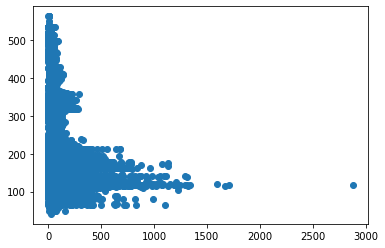

In [47]:
#Analyse the data 

plt.scatter(data['UnitsSold'],data['TotalPrice'])
plt.show()

In [48]:
#check for correlation between the variables

corrdata=data.corr()
corrdata

,StoreID,TotalPrice,BasePrice,UnitsSold
StoreID,1.000000,-0.038337,-0.038868,-0.004348
TotalPrice,-0.038337,1.000000,0.958867,-0.235619
BasePrice,-0.038868,0.958867,1.000000,-0.139995
UnitsSold,-0.004348,-0.235619,-0.139995,1.000000


<AxesSubplot:>

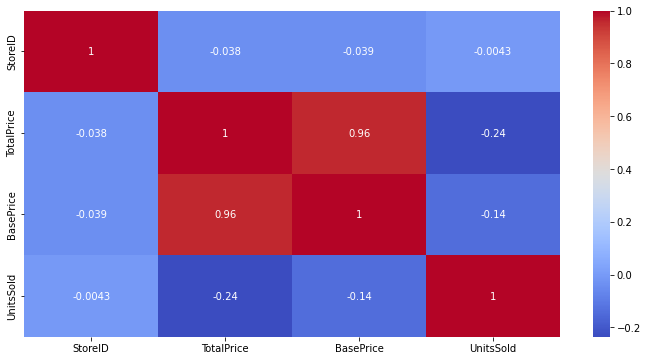

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(corrdata,annot=True,cmap='coolwarm')


In [50]:
#Above heatmap shows base price and total price are highly correlated with a value of 0.96

### Splitting the dataset into Training set and Test set

In [51]:
##Extracting dependent and independent variables
x=data.iloc[:,2:4] #predictors
x.shape

(150150, 2)

In [52]:
y=data.iloc[:,-1]#target/label
y

0         20.0
1         28.0
2         19.0
3         44.0
4         52.0
          ... 
150145    38.0
150146    30.0
150147    31.0
150148    12.0
150149    15.0
Name: UnitsSold, Length: 150150, dtype: float64

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [81]:
from sklearn.tree import DecisionTreeRegressor
model =DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [82]:
y_pred=model.predict(x_test)
y_pred


array([ 36.85066054,  26.63764962, 199.17021277, ...,  75.47086247,
        26.        ,  54.43642612])

In [83]:
model.score(x_test,y_test)

0.3448286690319624